In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:

def make_plots_each_algorithm(df_path):
    
    
    df = pd.read_csv(df_path)



    columns = list(df.columns)
    # conf_mat_cols = [col for col in columns if col.split("-")[1] in ['TP','TN','FP','FN']]
    # confusion matrix value we not need for now
    # df = df[(df["Score"] < 1) & (df['Score'] != 0)]

    df = df[df['Metrics'].apply(lambda x: False if x.split("-")[1] in ['TP','TN','FP','FN','FalsePositiveRate','FalseNegativeRate'] else True)]

    df['Score'] = round(df['Score'],2)

    df['Set'] = df['Metrics'].apply(lambda x: x.split("-")[0])

    return df


    algorithms = df['Algorithm'].unique().tolist()
    imbalance_mets = df['Imbalance'].unique().tolist()

    
    for algorithm in algorithms:

        for imb in imbalance_mets:
            

        
            alg_df = df[(df['Algorithm']==algorithm) & (df['Imbalance']==imb)].copy()
            sns.barplot(alg_df,x='Metrics',y='Score')
            plt.title(algorithm + ", " + imb)
            plt.xticks(rotation=45)
            plt.show()
                    
    


# def make_plots_each_metric()


In [10]:
df = make_plots_each_algorithm("../src/results/first_attempt_result.csv")

In [11]:
df

,Algorithm,ImputerNum,ImputerCat,Imbalance,Metrics,Score,Set
0,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.98,Train
1,DecisionTree,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,1.00,Train
2,NaiveBayes,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.93,Train
3,KNN,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.98,Train
4,SVM,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.98,Train
...,...,...,...,...,...,...,...
2595,LogisticRegression,KNNImpuer,SimpleImputer_mode,RandomUnderSampler,Test-Precision,0.98,Test
2596,DecisionTree,KNNImpuer,SimpleImputer_mode,RandomUnderSampler,Test-Precision,0.99,Test
2597,NaiveBayes,KNNImpuer,SimpleImputer_mode,RandomUnderSampler,Test-Precision,0.98,Test
2598,KNN,KNNImpuer,SimpleImputer_mode,RandomUnderSampler,Test-Precision,0.96,Test


/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


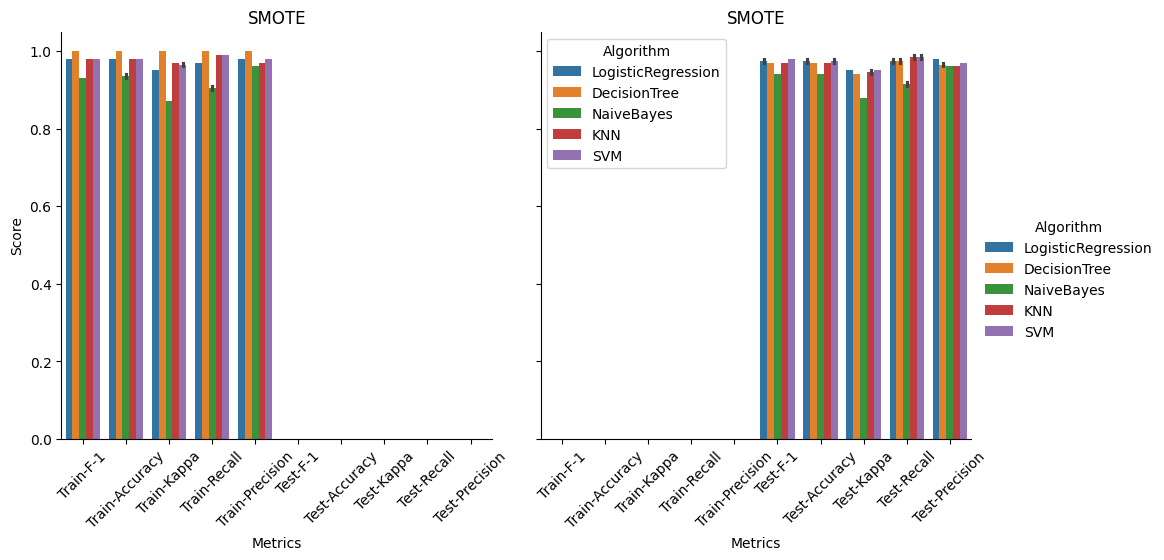

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


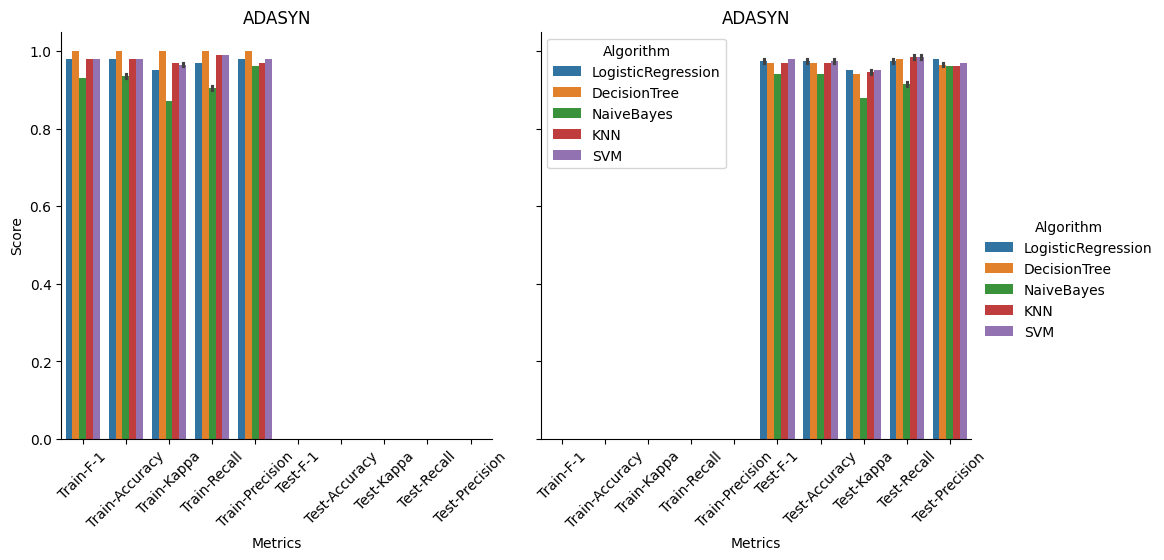

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


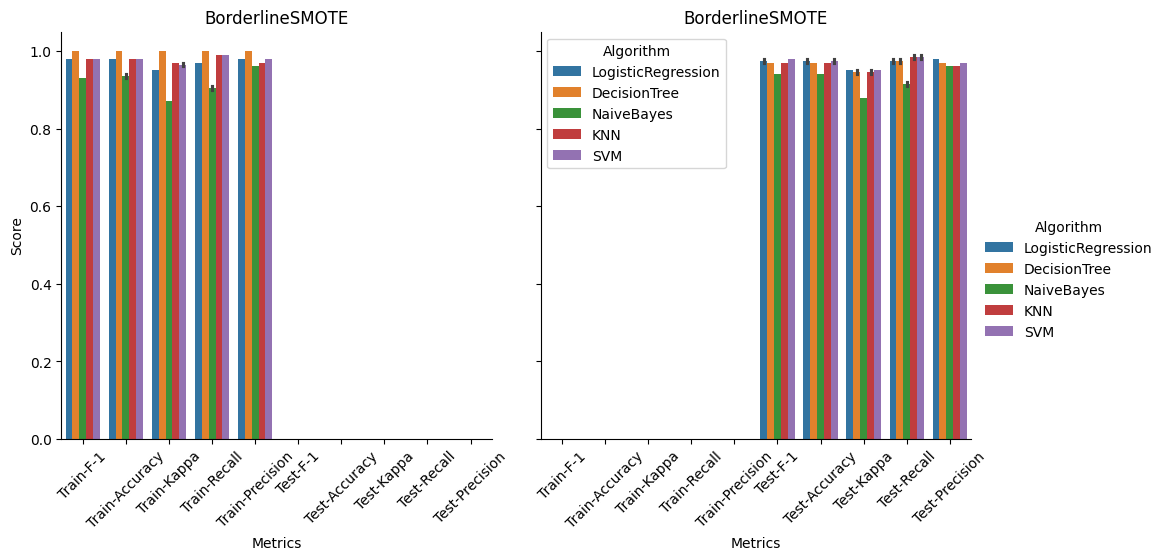

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


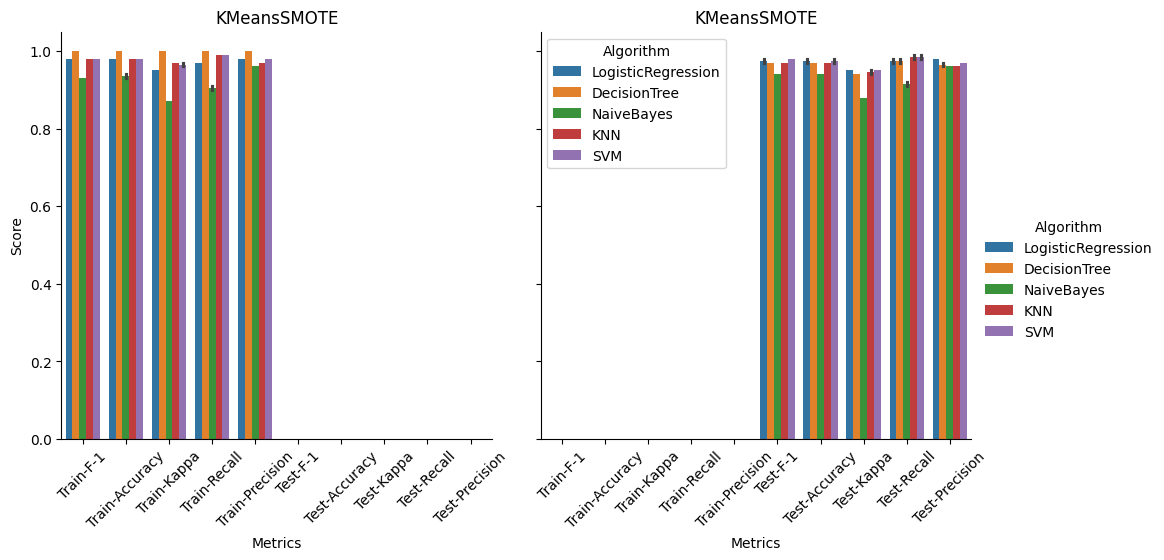

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


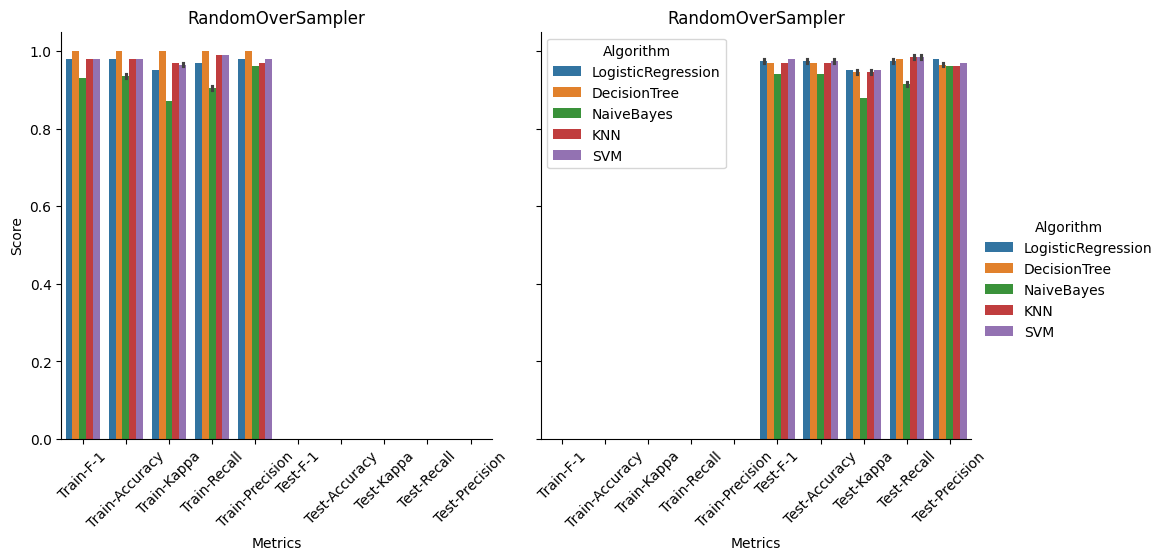

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


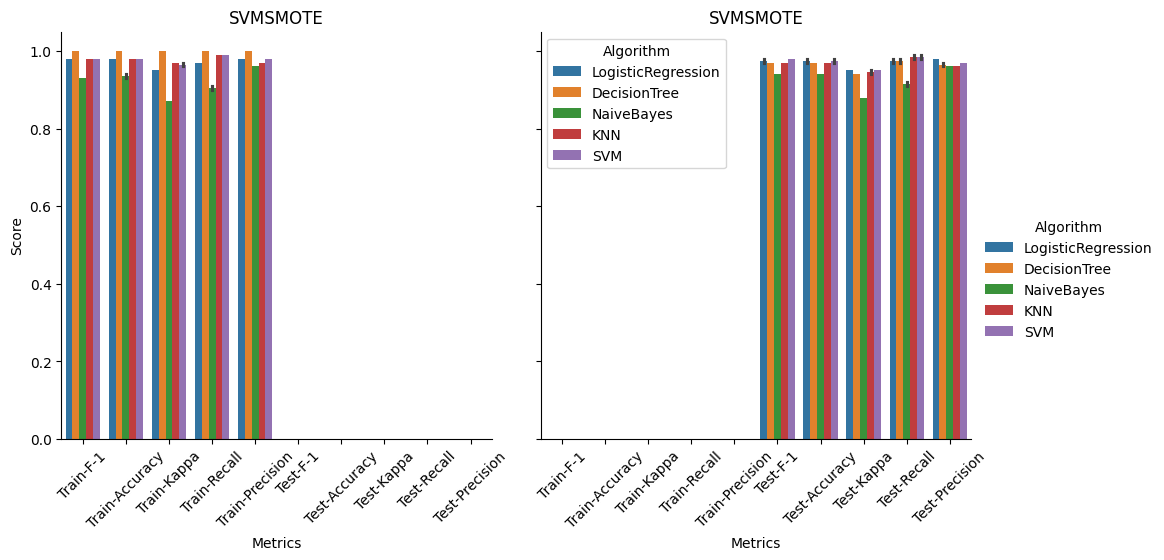

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


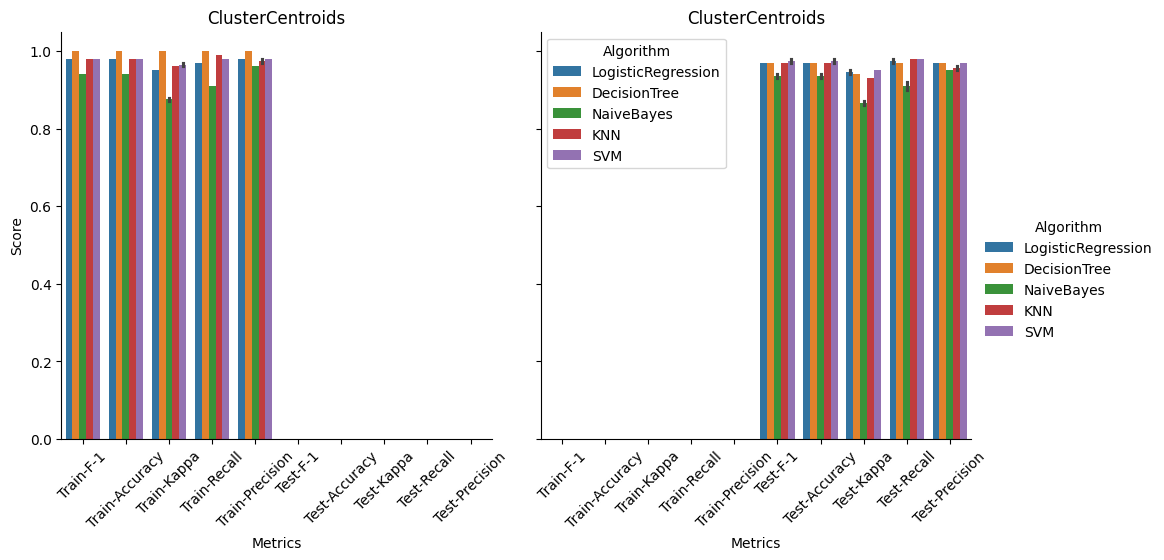

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


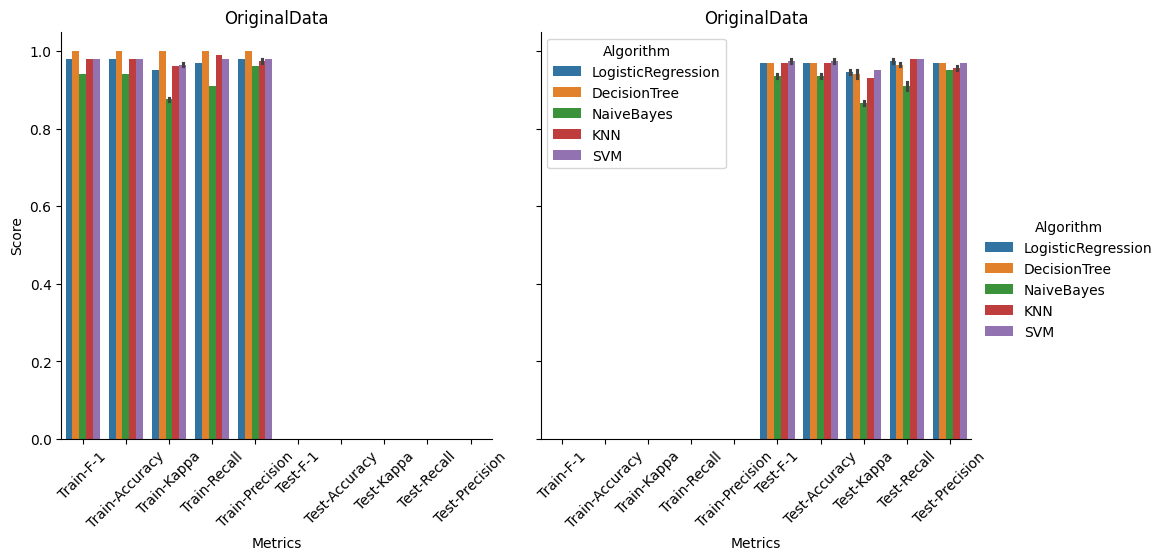

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


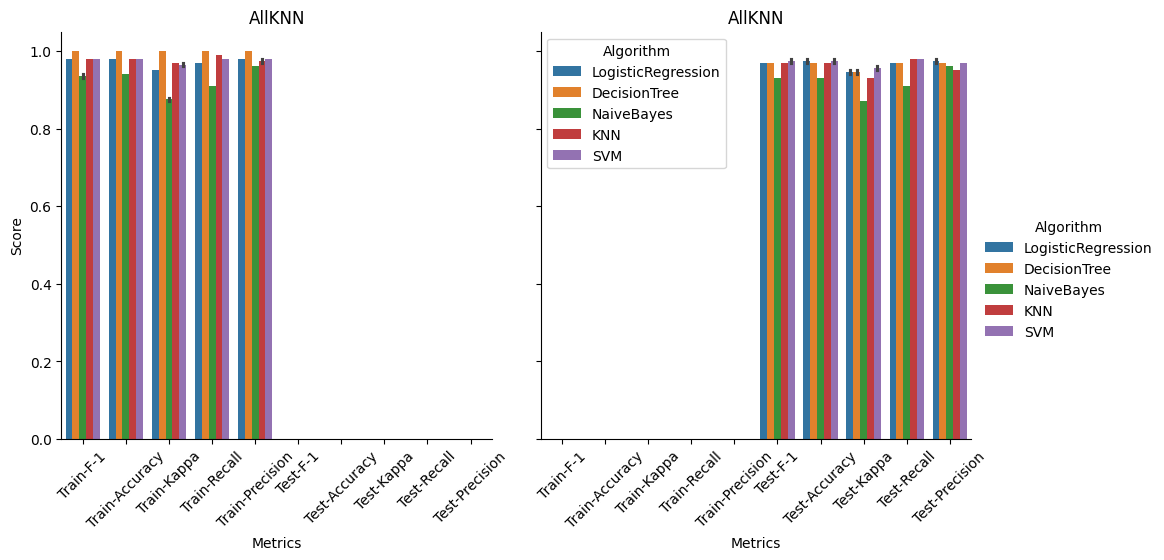

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


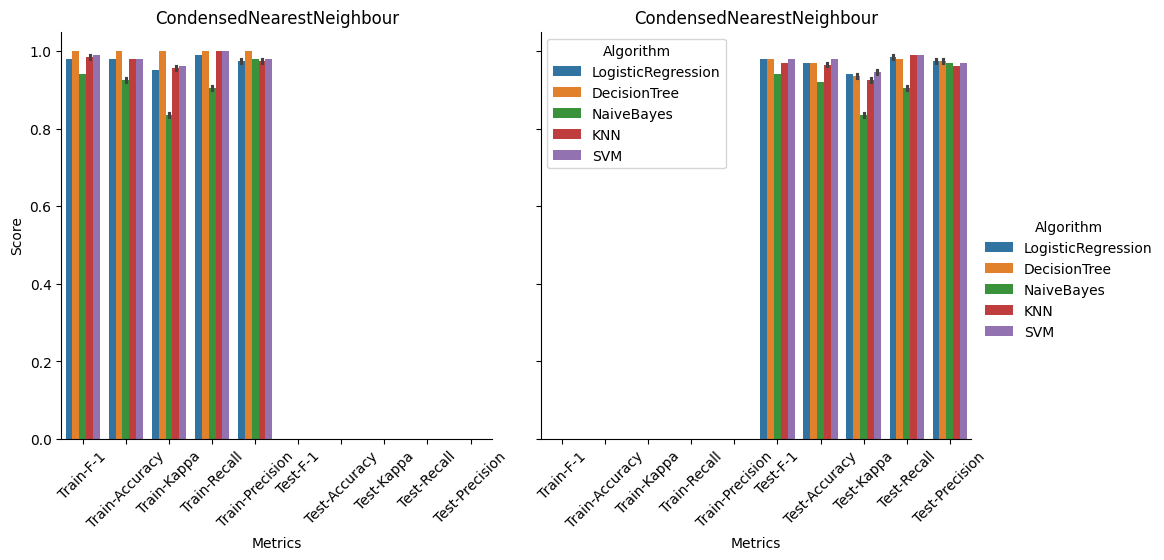

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


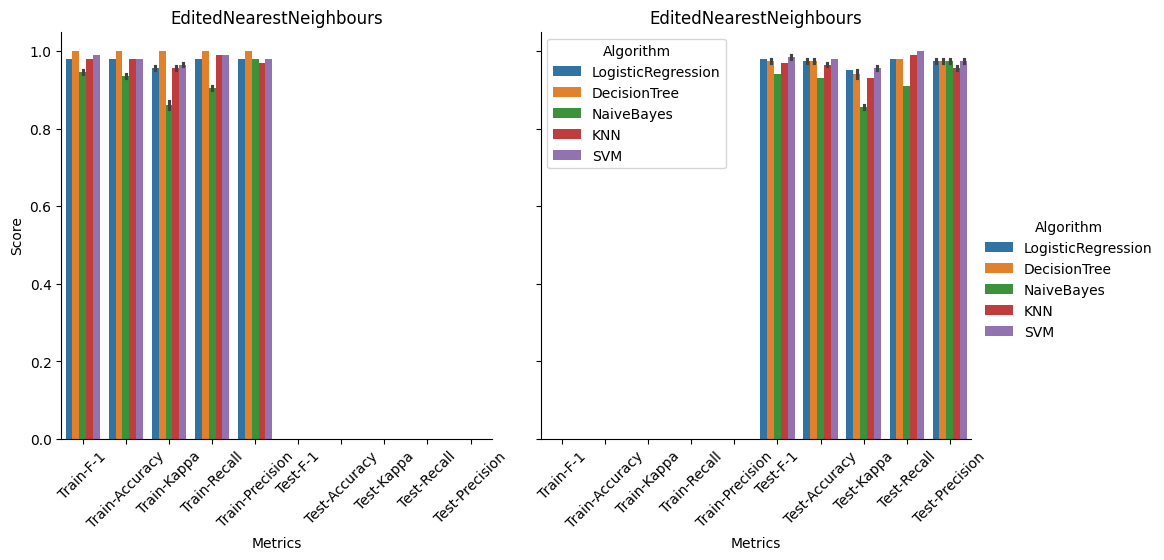

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


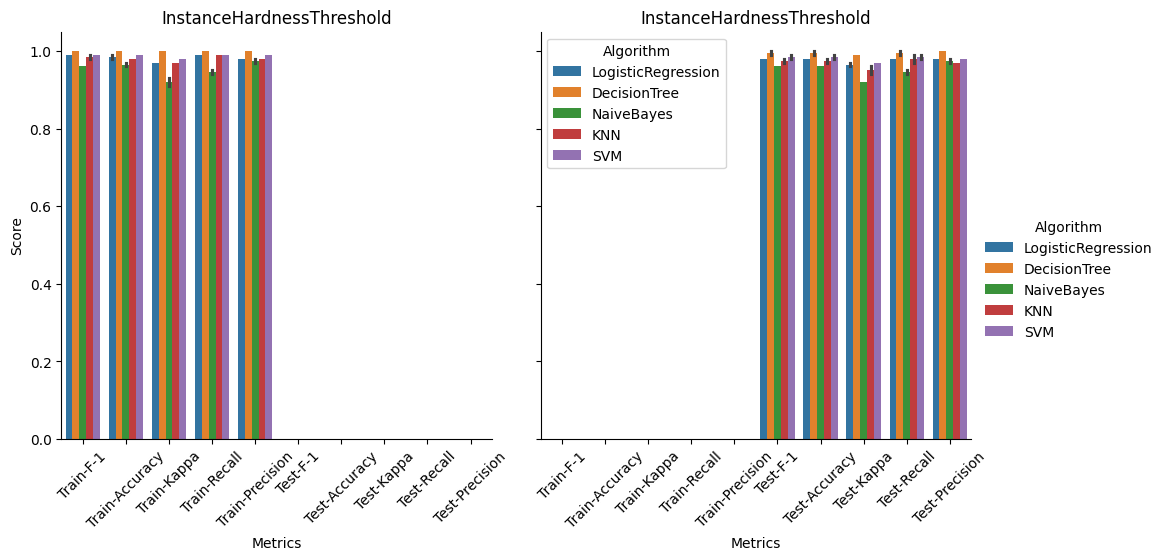

/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)
/tmp/ipykernel_101828/951735194.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.Metrics.unique(), rotation=45)


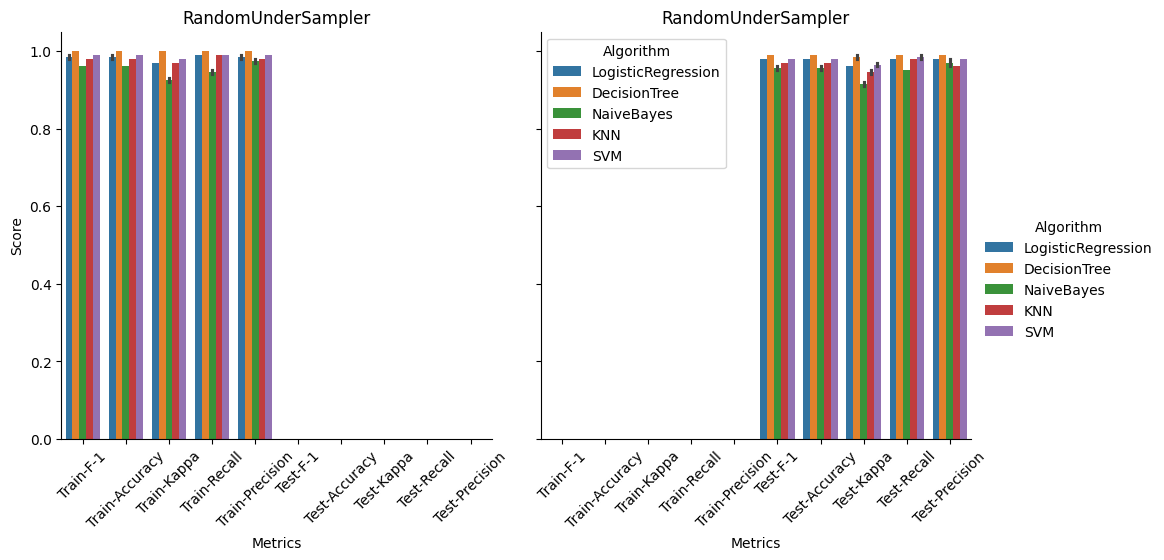

In [13]:
for bal in df['Imbalance'].unique():

    ddf = df[df['Imbalance'] == bal]
    
    g = sns.catplot(ddf,x='Metrics',y='Score',kind='bar',col='Set',hue='Algorithm',legend=True)
        
    plt.legend(title='Algorithm')
    # Rotate x-axis tick labels for all subplots
    for ax,ticks in zip(g.axes.flat,df.Metrics.unique()):
        ax.set_xticklabels(df.Metrics.unique(), rotation=45)
        ax.set_title(bal)
    # plt.xticks(rotation=45)
    # plt.title(bal)
    plt.show()

In [22]:
ax.get_xticklabels()

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, '')]